# Convex polyhedron

In [1]:
import fresnel
import itertools
import math
import numpy as np
device = fresnel.Device()
scene = fresnel.Scene(device)

The **convex polyhedron geometry** defines a set of *N* convex polyhedra. The shape of all *N* polyhedra is identical and defined by *P* planes. Each polyhedron has its own *position*, *orientation*, and *color*. You must also specify the circumsphere radius *r*. Note that the information used to draw a convex polyhedron is easily obtained from it's vertices via the `util.convex_polyhedron_from_vertices()` utility function.

To construct a truncated cube:

In [2]:
# first get cube verts
pm = [-1, 1]
cube_verts = list(itertools.product(pm, repeat=3))
trunc_cube_verts = []
# truncate by removing corners and adding vertices to edges
for p1, p2 in itertools.combinations(cube_verts, 2):
    # don't add points along any diagonals
    match = (p1[0]==p2[0], p1[1]==p2[1], p1[2]==p2[2])
    if match.count(False) == 1: # only 1 coordinate changes, not a diagonal
        p1, p2 = np.array(p1), np.array(p2)
        vec = p2 - p1
        trunc_cube_verts.append(p1 + vec/3)
        trunc_cube_verts.append(p1 + 2*vec/3)

In [3]:
c1 = fresnel.color.linear([0.70, 0.87, 0.54])*0.8
c2 = fresnel.color.linear([0.65,0.81,0.89])*0.8
colors = {8: c1, 3: c2}
poly_info = fresnel.util.convex_polyhedron_from_vertices(trunc_cube_verts)
for idx, fs in enumerate(poly_info['face_sides']):
    poly_info['face_color'][idx] = colors[fs]
geometry = fresnel.geometry.ConvexPolyhedron(scene,
                                             poly_info,
                                             N=3
                                            )
geometry.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]),
                                              roughness=0.8)

## Geometric properties

**position** defines the position of the center of each convex polyhedron.

In [4]:
geometry.position[:] = [[-3,0,0], [0, 0, 0], [3, 0, 0]]

**orientation** sets the orientation of each convex polyhedron as a quaternion

In [5]:
geometry.orientation[:] = [[1, 0, 0, 0],
                           [0.80777943,  0.41672122,  0.00255412,  0.41692838],
                           [0.0347298, 0.0801457, 0.98045, 0.176321]]

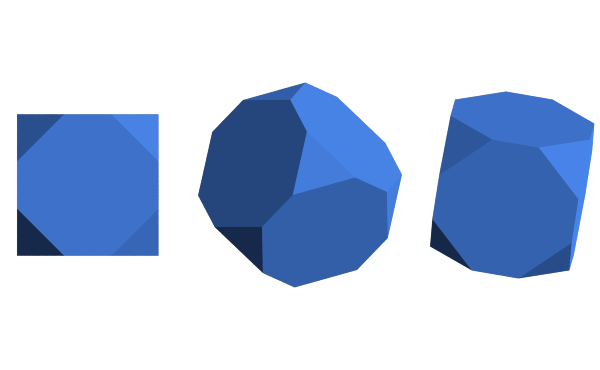

In [6]:
scene.camera = fresnel.camera.fit(scene, view='front', margin=0.8)
fresnel.preview(scene, aa_level=3)

## Color

**color** sets the color of each individual convex polyhedron (when *primitive_color_mix > 0* and *color_by_face < 1* )

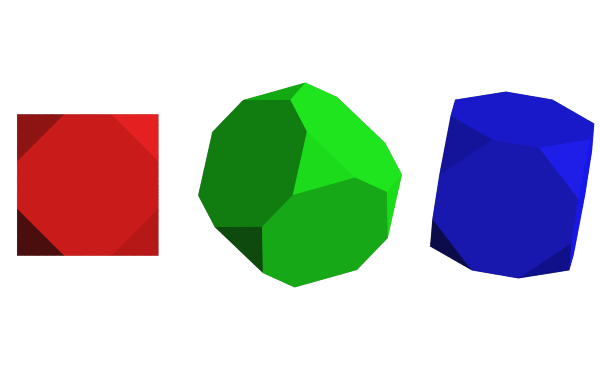

In [7]:
geometry.color[:] = fresnel.color.linear([[0.9,0,0], [0, 0.9, 0], [0, 0, 0.9]])
geometry.material.primitive_color_mix = 1.0
fresnel.preview(scene, aa_level=3)

Set **color_by_face** > 0 to color the faces of the polyhedra independently. `poly_info['face_colors']` (i.e., the output of convex_polyhedron_from_vertices, which we modified above) sets the color of each face. Above, we set the color of the each face based on number of sides it has.

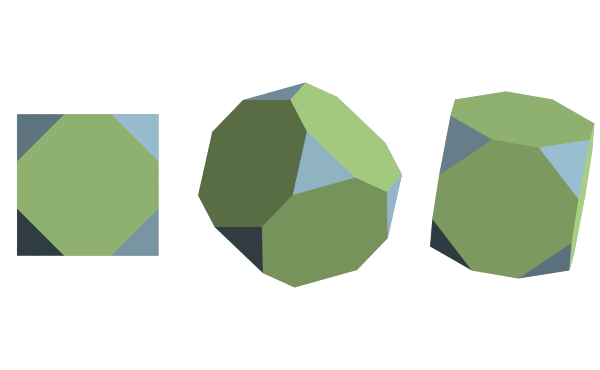

In [8]:
geometry.color_by_face = 1.0
fresnel.preview(scene, aa_level=3)

## Outlines

Outlines are applied at the outer edge of each face.

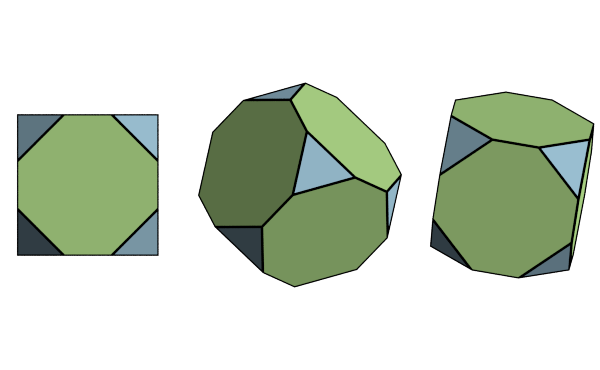

In [9]:
geometry.outline_width = 0.02
fresnel.preview(scene, aa_level=3)

This page was generated from a [jupyter](https://jupyter.org/) notebook. You can download and run the notebook locally from the [fresnel-examples](https://bitbucket.org/glotzer/fresnel-examples) repository.